In [39]:
# import Libraries:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

In [41]:
# Load Dataset:

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

df.shape

(150, 5)

In [43]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
# Build Decision Tree Classifier Model:

model = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [47]:
# Visualize the Decision Tree:

tree_value = export_text(model, feature_names=iris.feature_names)
print(tree_value)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.15
|   |   |   |--- class: 2



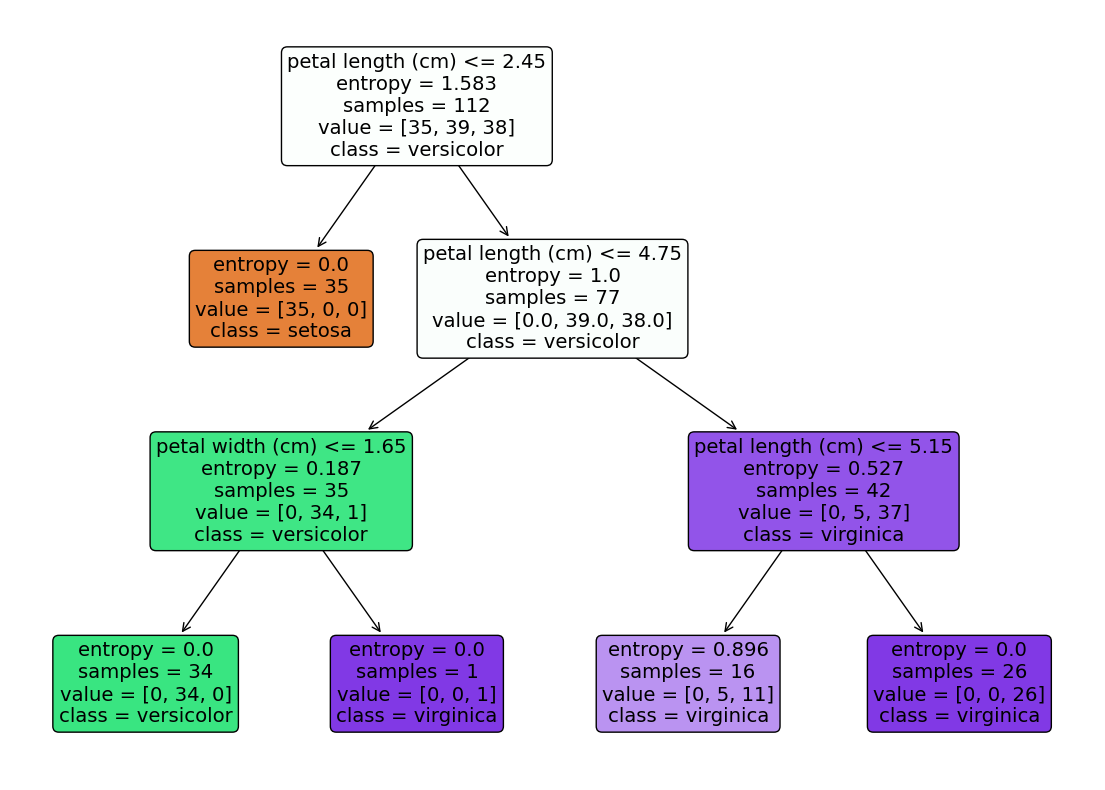

In [49]:
# Ploting the Tree:

plt.figure(figsize=(14,10))
plot_tree(model, 
        feature_names=iris.feature_names,
        class_names = iris.target_names,
        filled = True,
        rounded = True)
plt.show()

In [51]:
# make Prediction:

y_pred = model.predict(X_test)

Accuracy Score: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



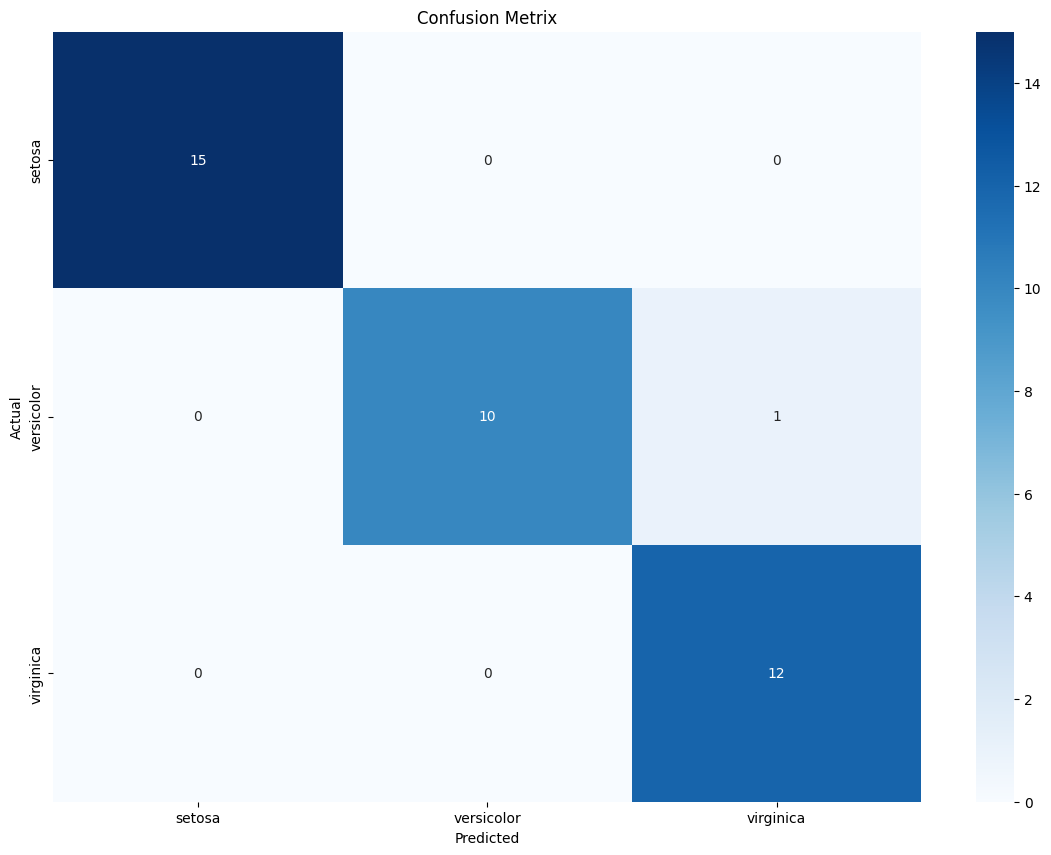

In [53]:
#Evaluate the model:

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Metrix:

plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Metrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()